In [294]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [296]:
train_r = '/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/0.5_tot.csv'
test_r= '/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/0.5_totT.csv'
#temp_r='/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/tot.csv'
#tempT_r='/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/totT.csv'

In [297]:
train = pd.read_csv(train_r)
test = pd.read_csv(test_r)
#new = pd.read_csv(temp_r)
#newT=pd.read_csv(tempT_r)

In [298]:
train.columns

Index(['ID', 'first_party_winner', 't_facts', '승률범주형분류', 'issued_area',
       'first_party_ner', 'second_party_ner', 'sen_len', 'word_len'],
      dtype='object')

In [299]:
test.columns

Index(['ID', 't_facts', '승률범주형분류', 'issued_area', 'second_party_ner',
       'first_party_ner', 'sen_len', 'word_len'],
      dtype='object')

In [300]:
train.rename(columns={'t_facts':'facts_Org'},inplace=True)
test.rename(columns={'t_facts':'facts_Org'},inplace=True)

In [301]:
train.head()

,ID,first_party_winner,facts_Org,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len
0,TRAIN_0000,1,"On June 27, 1962, <p1> a candidate for public ...",1,others,PERSON,PERSON,7,214
1,TRAIN_0001,0,Ramon Nelson was riding his bike when he suffe...,1,criminal,PERSON,PERSON,7,232
2,TRAIN_0002,1,An Alabama state court convicted <p1> of murde...,1,criminal,PERSON,GPE,8,213
3,TRAIN_0003,0,Victor <p1> was convicted in state court on ev...,1,others,others,others,3,63
4,TRAIN_0004,1,"On April 24, 1953 in Selma, <p2> an intruder b...",1,others,PERSON,GPE,9,213


In [302]:
train=pd.get_dummies(train, columns=['first_party_winner'],drop_first=True)
train

,ID,facts_Org,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner_1
0,TRAIN_0000,"On June 27, 1962, <p1> a candidate for public ...",1,others,PERSON,PERSON,7,214,1
1,TRAIN_0001,Ramon Nelson was riding his bike when he suffe...,1,criminal,PERSON,PERSON,7,232,0
2,TRAIN_0002,An Alabama state court convicted <p1> of murde...,1,criminal,PERSON,GPE,8,213,1
3,TRAIN_0003,Victor <p1> was convicted in state court on ev...,1,others,others,others,3,63,0
4,TRAIN_0004,"On April 24, 1953 in Selma, <p2> an intruder b...",1,others,PERSON,GPE,9,213,1
...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,Congress amended the Clean Air Act through the...,1,others,ORG,ORG,5,148,1
2474,TRAIN_2474,"<p2> an investment fund, purchased approximate...",1,others,PERSON,ORG,7,192,1
2475,TRAIN_2475,"In 1992, the District Court sentenced Manuel D...",1,criminal,ORG,GPE,6,207,0
2476,TRAIN_2476,"On March 8, 1996, Enrico <p2> a lawful permane...",2,others,ORG,others,8,212,0


In [303]:
train.rename(columns={'first_party_winner_1':'first_party_winner'},inplace=True)

In [304]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   facts_Org           2478 non-null   object
 2   승률범주형분류             2478 non-null   int64 
 3   issued_area         2478 non-null   object
 4   first_party_ner     2478 non-null   object
 5   second_party_ner    2478 non-null   object
 6   sen_len             2478 non-null   int64 
 7   word_len            2478 non-null   int64 
 8   first_party_winner  2478 non-null   uint8 
dtypes: int64(3), object(5), uint8(1)
memory usage: 157.4+ KB


In [305]:
temp=train
temp

,ID,facts_Org,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner
0,TRAIN_0000,"On June 27, 1962, <p1> a candidate for public ...",1,others,PERSON,PERSON,7,214,1
1,TRAIN_0001,Ramon Nelson was riding his bike when he suffe...,1,criminal,PERSON,PERSON,7,232,0
2,TRAIN_0002,An Alabama state court convicted <p1> of murde...,1,criminal,PERSON,GPE,8,213,1
3,TRAIN_0003,Victor <p1> was convicted in state court on ev...,1,others,others,others,3,63,0
4,TRAIN_0004,"On April 24, 1953 in Selma, <p2> an intruder b...",1,others,PERSON,GPE,9,213,1
...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,Congress amended the Clean Air Act through the...,1,others,ORG,ORG,5,148,1
2474,TRAIN_2474,"<p2> an investment fund, purchased approximate...",1,others,PERSON,ORG,7,192,1
2475,TRAIN_2475,"In 1992, the District Court sentenced Manuel D...",1,criminal,ORG,GPE,6,207,0
2476,TRAIN_2476,"On March 8, 1996, Enrico <p2> a lawful permane...",2,others,ORG,others,8,212,0


In [306]:
import re
from bs4 import BeautifulSoup

In [307]:
import nltk
nltk.download('stopwords')
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [308]:
# Count occurrences of '<p1>' and '<p2>' in each row
temp['p1'] = temp['facts_Org'].apply(lambda x: x.count('<p1>'))
temp['p2'] = temp['facts_Org'].apply(lambda x: x.count('<p2>'))

In [309]:
test['p1'] = test['facts_Org'].apply(lambda x: x.count('<p1>'))
test['p2'] = test['facts_Org'].apply(lambda x: x.count('<p2>'))

In [310]:
temp['facts_Org'] = temp['facts_Org'].str.replace('<p1>', '').str.replace('<p2>', '')
temp

,ID,facts_Org,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner,p1,p2
0,TRAIN_0000,"On June 27, 1962, a candidate for public offi...",1,others,PERSON,PERSON,7,214,1,7,5
1,TRAIN_0001,Ramon Nelson was riding his bike when he suffe...,1,criminal,PERSON,PERSON,7,232,0,0,7
2,TRAIN_0002,An Alabama state court convicted of murder an...,1,criminal,PERSON,GPE,8,213,1,7,5
3,TRAIN_0003,Victor was convicted in state court on eviden...,1,others,others,others,3,63,0,2,0
4,TRAIN_0004,"On April 24, 1953 in Selma, an intruder broke...",1,others,PERSON,GPE,9,213,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,Congress amended the Clean Air Act through the...,1,others,ORG,ORG,5,148,1,2,0
2474,TRAIN_2474,"an investment fund, purchased approximately $...",1,others,PERSON,ORG,7,192,1,3,5
2475,TRAIN_2475,"In 1992, the District Court sentenced Manuel D...",1,criminal,ORG,GPE,6,207,0,6,0
2476,TRAIN_2476,"On March 8, 1996, Enrico a lawful permanent r...",2,others,ORG,others,8,212,0,9,4


In [311]:
test['facts_Org'] = test['facts_Org'].str.replace('<p1>', '').str.replace('<p2>', '')
test

,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0
...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,According to Executive Order No. 12807 signed ...,1,criminal,ORG,ORG,5,165,6,1
1236,TEST_1236,Section 109(a) of the Clean Air Act (CAA) requ...,1,criminal,ORG,others,7,221,0,0
1237,TEST_1237,created a plan for utilizing $2.6 million in ...,1,others,PERSON,PERSON,12,258,11,4
1238,TEST_1238,"In 1972, the North Carolina Board of Agricultu...",1,others,PERSON,ORG,3,85,1,0


In [312]:
# Remove HTTP tags
%time temp['facts_Processed']=temp['facts_Org'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
%time test['facts_Processed']=test['facts_Org'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
temp

CPU times: user 376 ms, sys: 727 µs, total: 377 ms
Wall time: 379 ms
CPU times: user 194 ms, sys: 0 ns, total: 194 ms
Wall time: 195 ms


,ID,facts_Org,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner,p1,p2,facts_Processed
0,TRAIN_0000,"On June 27, 1962, a candidate for public offi...",1,others,PERSON,PERSON,7,214,1,7,5,On June 27 1962 a candidate for public office ...
1,TRAIN_0001,Ramon Nelson was riding his bike when he suffe...,1,criminal,PERSON,PERSON,7,232,0,0,7,Ramon Nelson was riding his bike when he suffe...
2,TRAIN_0002,An Alabama state court convicted of murder an...,1,criminal,PERSON,GPE,8,213,1,7,5,An Alabama state court convicted of murder and...
3,TRAIN_0003,Victor was convicted in state court on eviden...,1,others,others,others,3,63,0,2,0,Victor was convicted in state court on evidenc...
4,TRAIN_0004,"On April 24, 1953 in Selma, an intruder broke...",1,others,PERSON,GPE,9,213,1,6,2,On April 24 1953 in Selma an intruder broke in...
...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,Congress amended the Clean Air Act through the...,1,others,ORG,ORG,5,148,1,2,0,Congress amended the Clean Air Act through the...
2474,TRAIN_2474,"an investment fund, purchased approximately $...",1,others,PERSON,ORG,7,192,1,3,5,an investment fund purchased approximately 75 ...
2475,TRAIN_2475,"In 1992, the District Court sentenced Manuel D...",1,criminal,ORG,GPE,6,207,0,6,0,In 1992 the District Court sentenced Manuel D ...
2476,TRAIN_2476,"On March 8, 1996, Enrico a lawful permanent r...",2,others,ORG,others,8,212,0,9,4,On March 8 1996 Enrico a lawful permanent resi...


In [313]:
#remove name

from nltk.corpus import names
all_names=set(names.words())

%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in all_names]))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in all_names]))
test.head()

CPU times: user 77.6 ms, sys: 0 ns, total: 77.6 ms
Wall time: 77.6 ms
CPU times: user 40.7 ms, sys: 0 ns, total: 40.7 ms
Wall time: 40.7 ms


,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,The 1984 Bail Reform Act allowed the federal c...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,Lexecon was a defendant in a class action laws...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,In 2002 and 2003 Stations broadcast the Billbo...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,During his trial for armed robbery of a federa...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,In 1993 a magistrate judge issued a warrant au...


In [314]:
#Lower Case
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: x.lower())
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x: x.lower())
test.head()

CPU times: user 6.79 ms, sys: 0 ns, total: 6.79 ms
Wall time: 6.91 ms
CPU times: user 2.97 ms, sys: 0 ns, total: 2.97 ms
Wall time: 3.74 ms


,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,the 1984 bail reform act allowed the federal c...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon was a defendant in a class action laws...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,in 2002 and 2003 stations broadcast the billbo...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,during his trial for armed robbery of a federa...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,in 1993 a magistrate judge issued a warrant au...


In [315]:
#Remove punctuations
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
test.head()

CPU times: user 40.6 ms, sys: 0 ns, total: 40.6 ms
Wall time: 41.5 ms
CPU times: user 20.8 ms, sys: 960 µs, total: 21.7 ms
Wall time: 22.1 ms


,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,the 1984 bail reform act allowed the federal c...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon was a defendant in a class action laws...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,in 2002 and 2003 stations broadcast the billbo...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,during his trial for armed robbery of a federa...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,in 1993 a magistrate judge issued a warrant au...


In [316]:
#Remove unicodes
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
test.head()

CPU times: user 42.1 ms, sys: 0 ns, total: 42.1 ms
Wall time: 43 ms
CPU times: user 31.1 ms, sys: 0 ns, total: 31.1 ms
Wall time: 33.4 ms


,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,the 1984 bail reform act allowed the federal c...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon was a defendant in a class action laws...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,in 2002 and 2003 stations broadcast the billbo...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,during his trial for armed robbery of a federa...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,in 1993 a magistrate judge issued a warrant au...


In [317]:
#Remove numbaer
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[0-9]', '', x))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x: re.sub(r'[0-9]', '', x))
test.head()

CPU times: user 57.4 ms, sys: 0 ns, total: 57.4 ms
Wall time: 68.5 ms
CPU times: user 29.9 ms, sys: 0 ns, total: 29.9 ms
Wall time: 30.3 ms


,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,the bail reform act allowed the federal court...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon was a defendant in a class action laws...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,in and stations broadcast the billboard musi...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,during his trial for armed robbery of a federa...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,in a magistrate judge issued a warrant author...


In [318]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [319]:
month=['january', 'febuary', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

In [320]:
# Remove stopwords
stop_words = stopwords.words('english')
temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
test.head()

,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,bail reform act allowed federal courts detain ...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon defendant class action lawsuit usc sec...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,stations broadcast billboard music awards annu...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,trial armed robbery federally insured savings ...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,magistrate judge issued warrant authorizing se...


In [321]:
# Remove month
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in month]))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in month]))
test.head()

CPU times: user 70.4 ms, sys: 0 ns, total: 70.4 ms
Wall time: 73.2 ms
CPU times: user 35.5 ms, sys: 0 ns, total: 35.5 ms
Wall time: 35.5 ms


,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,bail reform act allowed federal courts detain ...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon defendant class action lawsuit usc sec...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,stations broadcast billboard music awards annu...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,trial armed robbery federally insured savings ...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,magistrate judge issued warrant authorizing se...


In [322]:
# Lemmatize the noun
lemmatizer = WordNetLemmatizer()

temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split()]))
test['facts_Processed'] = test['facts_Processed'].map(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split()]))

test.head()

,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,bail reform act allowed federal court detain a...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon defendant class action lawsuit usc sec...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,station broadcast billboard music award annual...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,trial armed robbery federally insured saving l...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,magistrate judge issued warrant authorizing se...


In [323]:
# Lemmatize the verb
lemmer = WordNetLemmatizer()

temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w, pos='v') for w in x.split() if w not in stop_words]))
test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w, pos='v') for w in x.split() if w not in stop_words]))
test.head()

,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,bail reform act allow federal court detain arr...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon defendant class action lawsuit usc sec...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,station broadcast billboard music award annual...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,trial arm robbery federally insure save loan a...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,magistrate judge issue warrant authorize searc...


In [324]:
#stemmer

ps = nltk.stem.porter.PorterStemmer()

temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([ps.stem(w) for w in x.split() if w not in stop_words]))
test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([ps.stem(w) for w in x.split() if w not in stop_words]))
test.head()

,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,bail reform act allow feder court detain arres...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon defend class action lawsuit usc sectio...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,station broadcast billboard music award annual...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,trial arm robberi feder insur save loan associ...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,magistr judg issu warrant author search montan...


In [325]:
#Removing Stop words again after Lemmatize & Stemmer
temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
test.head()

,ID,facts_Org,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,facts_Processed
0,TEST_0000,The 1984 Bail Reform Act allowed the federal c...,1,others,GPE,others,2,57,1,0,bail reform act allow feder court detain arres...
1,TEST_0001,Lexecon was a defendant in a class action law...,1,criminal,ORG,PERSON,7,221,7,1,lexecon defend class action lawsuit usc sectio...
2,TEST_0002,"In 2002 and 2003, Stations broadcast the Bill...",1,criminal,ORG,ORG,6,203,10,3,station broadcast billboard music award annual...
3,TEST_0003,During his trial for armed robbery of a federa...,1,others,GPE,PERSON,6,102,2,0,trial arm robberi feder insur save loan associ...
4,TEST_0004,"In 1993, a magistrate judge issued a warrant a...",1,others,others,PERSON,6,156,2,0,magistr judg issu warrant author search montan...


###Stage 2 : Embedding on the processed text data

In [326]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [327]:
from nltk import sent_tokenize

In [135]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [193]:
#15 most common and 15 most rare words
common_words = get_n_words(temp['facts_Processed'], "top", 15)
rare_words = get_n_words(temp['facts_Processed'], "bottom", 15)

In [194]:
#15 most common and 15 most rare words _test
common_wordsT = get_n_words(test['facts_Processed'], "top", 15)
rare_wordsT = get_n_words(test['facts_Processed'], "bottom", 15)

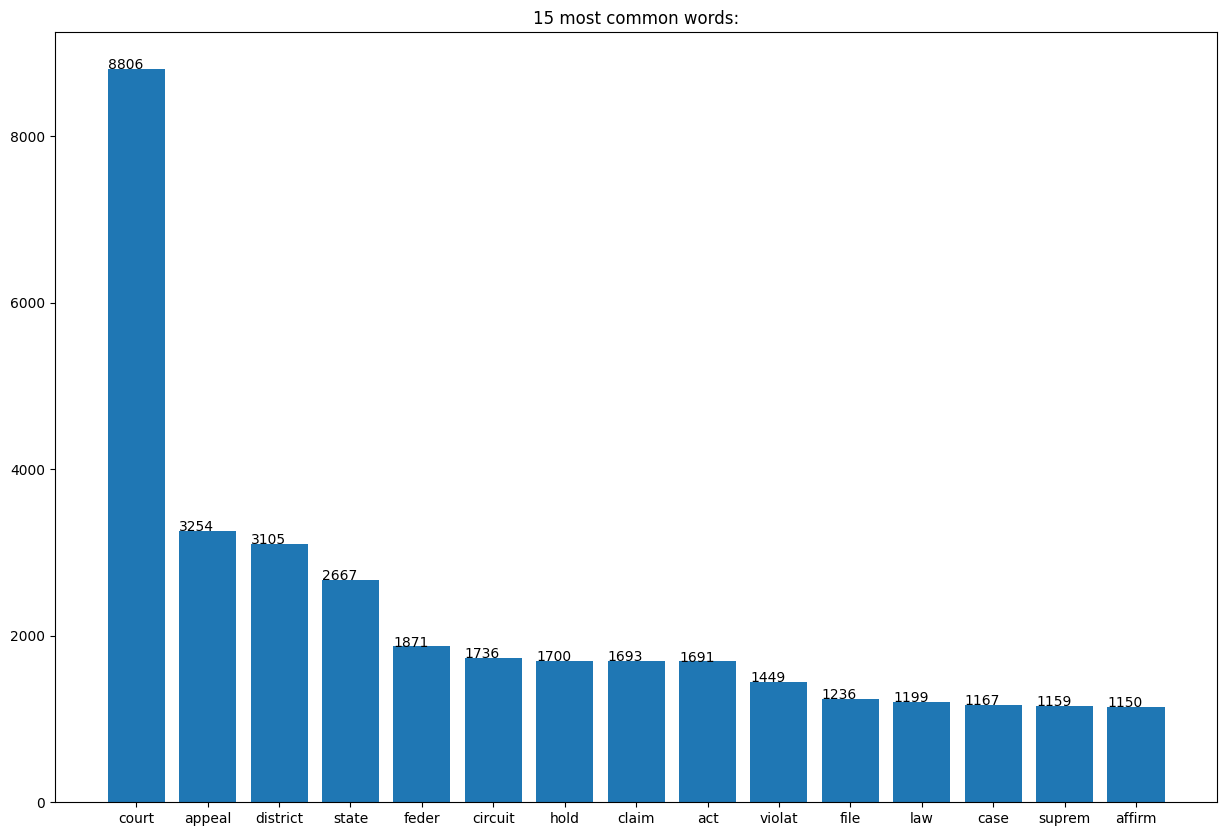

In [195]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

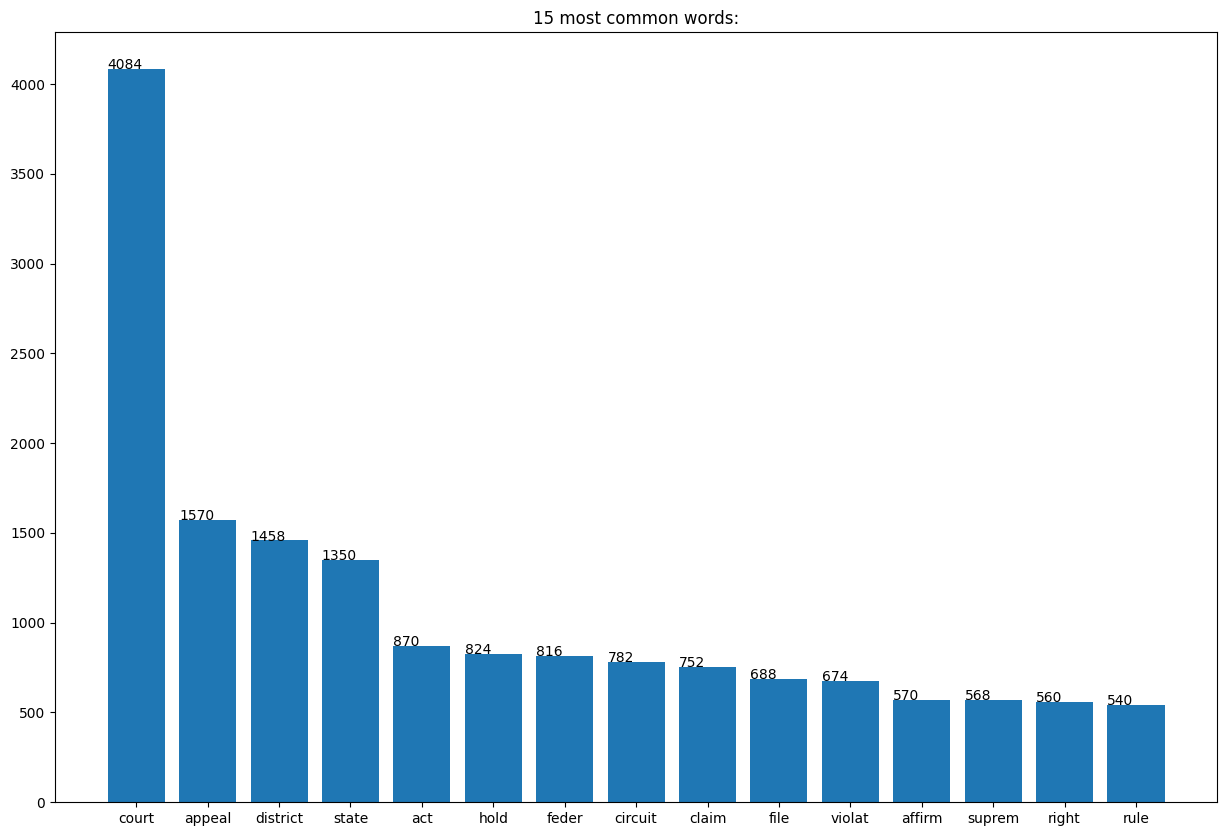

In [196]:
common_wordsT = dict(common_wordsT)
names = list(common_wordsT.keys())
values = list(common_wordsT.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_wordsT)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

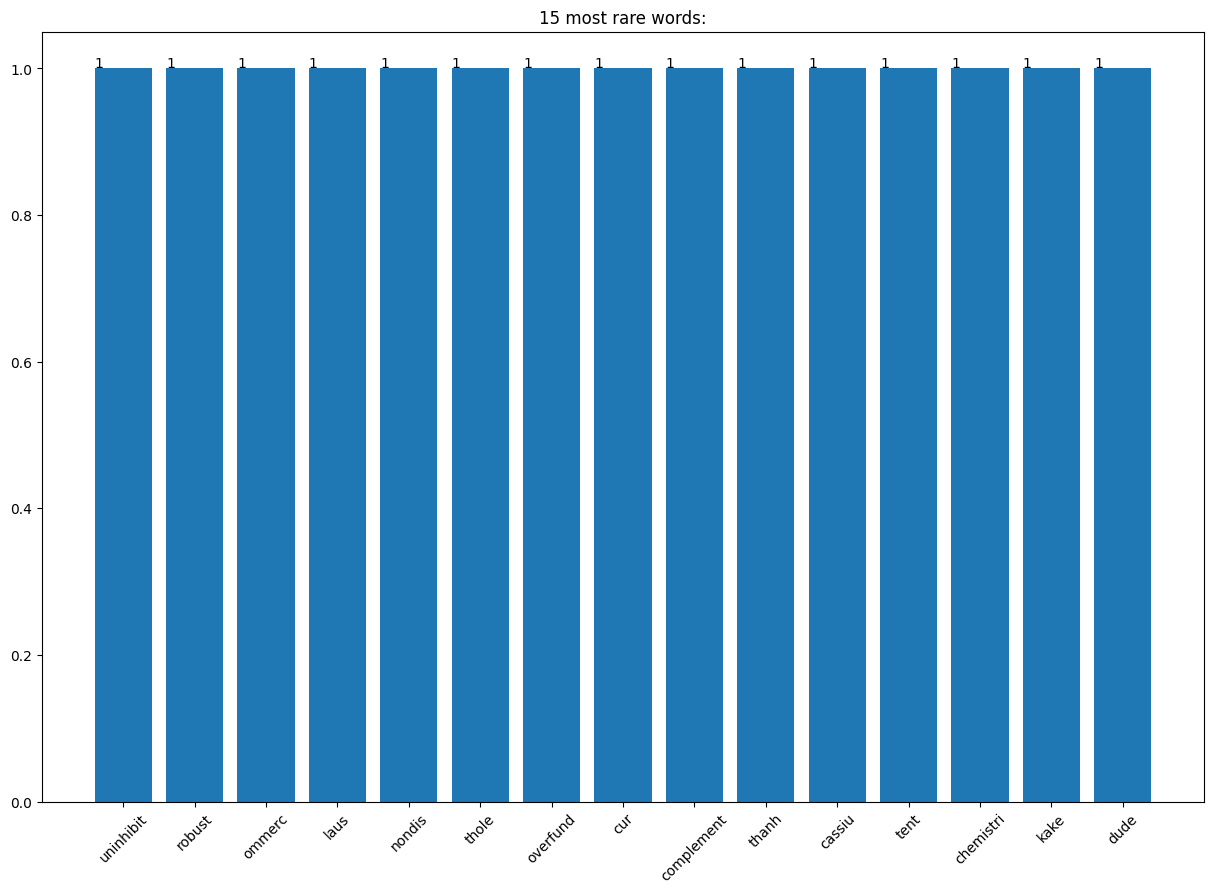

In [197]:
rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

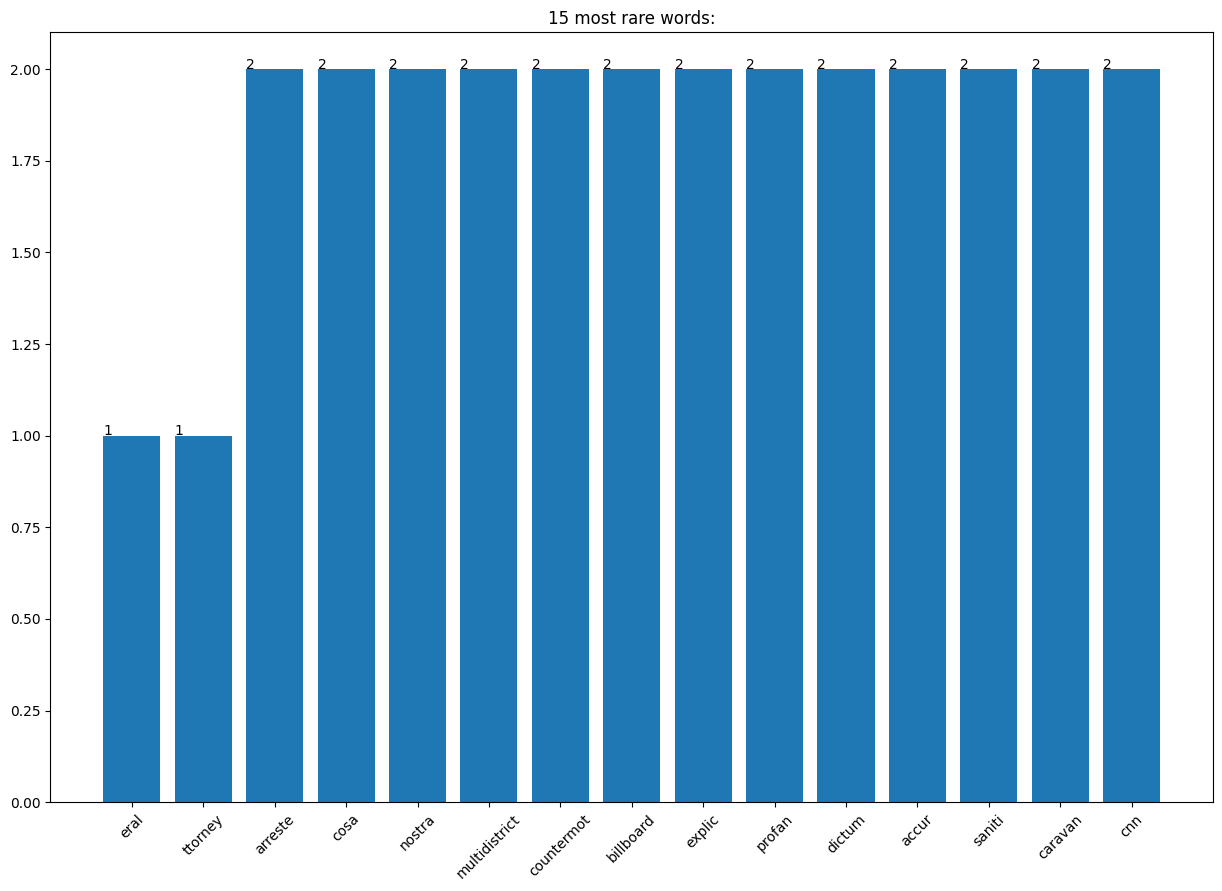

In [198]:
rare_wordsT = dict(rare_wordsT)
names = list(rare_wordsT.keys())
values = list(rare_wordsT.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_wordsT)),values,tick_label=names)
plt.title('15 most rare words:')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

In [142]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
# BOW-TF Embedding

no_features = 1500
tf_vectorizer = CountVectorizer(min_df=0.03, max_df=0.8, max_features=no_features, ngram_range=(1, 1))

%time tpl_tf = tf_vectorizer.fit_transform(temp['facts_Processed'])
%time tpl_tfT = tf_vectorizer.transform(test['facts_Processed'])
display("Bow-TF :", tpl_tf.shape)
display("Bow-TF :", tpl_tfT.shape)
train_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names_out())
test_tf = pd.DataFrame(tpl_tfT.toarray(), columns=tf_vectorizer.get_feature_names_out())
train_tf.head()


CPU times: user 191 ms, sys: 2.87 ms, total: 194 ms
Wall time: 194 ms
CPU times: user 90.8 ms, sys: 0 ns, total: 90.8 ms
Wall time: 91.4 ms


'Bow-TF :'

(2478, 454)

'Bow-TF :'

(1240, 454)

,abus,accept,accord,act,action,activ,actual,addit,administr,admit,...,well,whether,within,without,work,would,writ,write,year,york
0,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [144]:
test_tf

,abus,accept,accord,act,action,activ,actual,addit,administr,admit,...,well,whether,within,without,work,would,writ,write,year,york
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1236,0,0,0,1,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
1237,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
#Preparing processed and BoW-TF embedded data for Classification
train_tf_m = pd.concat([temp, train_tf], axis = 1)
test_tf_m = pd.concat([test, test_tf], axis = 1)
train_tf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
test_tf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
print(train_tf_m.shape)
print(test_tf_m.shape)
train_tf_m

(2478, 464)
(1240, 463)


,ID,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner,p1,p2,...,well,whether,within,without,work,would,writ,write,year,york
0,TRAIN_0000,3,others,PERSON,PERSON,7,214,1,7,5,...,0,1,0,0,0,0,0,0,0,0
1,TRAIN_0001,3,criminal,PERSON,PERSON,7,232,0,0,7,...,0,0,0,0,0,0,2,0,1,0
2,TRAIN_0002,3,criminal,PERSON,GPE,8,213,1,7,5,...,0,0,0,0,0,0,0,0,0,0
3,TRAIN_0003,3,others,others,others,3,63,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAIN_0004,3,others,PERSON,GPE,9,213,1,6,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,3,others,ORG,ORG,5,148,1,2,0,...,0,0,0,0,0,1,0,0,2,0
2474,TRAIN_2474,3,others,PERSON,ORG,7,192,1,3,5,...,0,0,0,0,0,1,0,0,0,0
2475,TRAIN_2475,3,criminal,ORG,GPE,6,207,0,6,0,...,0,0,0,0,0,0,0,0,0,0
2476,TRAIN_2476,5,others,ORG,others,8,212,0,9,4,...,0,0,0,0,0,0,0,0,0,0


In [146]:
test_tf_m

,ID,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,abus,...,well,whether,within,without,work,would,writ,write,year,york
0,TEST_0000,3,others,GPE,others,2,57,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TEST_0001,3,criminal,ORG,PERSON,7,221,7,1,0,...,0,0,0,0,0,0,0,0,0,0
2,TEST_0002,3,criminal,ORG,ORG,6,203,10,3,0,...,0,0,0,1,0,0,0,0,0,0
3,TEST_0003,3,others,GPE,PERSON,6,102,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TEST_0004,3,others,others,PERSON,6,156,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,3,criminal,ORG,ORG,5,165,6,1,0,...,0,0,0,1,0,0,0,0,0,1
1236,TEST_1236,3,criminal,ORG,others,7,221,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1237,TEST_1237,3,others,PERSON,PERSON,12,258,11,4,0,...,0,0,0,0,0,0,0,0,0,0
1238,TEST_1238,3,others,PERSON,ORG,3,85,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
train_tf_m.describe()

,승률범주형분류,sen_len,word_len,first_party_winner,p1,p2,abus,accept,accord,act,...,well,whether,within,without,work,would,writ,write,year,york
count,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,...,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,3.150928,7.395480,214.206215,0.665456,5.129944,4.566586,0.043180,0.035109,0.044794,0.682405,...,0.051251,0.070218,0.085956,0.145278,0.133575,0.263115,0.054479,0.043180,0.269169,0.066182
std,0.751140,3.439566,106.762497,0.471926,7.237037,7.527383,0.274307,0.212589,0.221956,1.139282,...,0.239845,0.312427,0.325657,0.427978,0.557109,0.606934,0.293686,0.252864,0.687117,0.395343
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,145.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,7.000000,199.500000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,9.000000,265.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,46.000000,1121.000000,1.000000,146.000000,141.000000,5.000000,4.000000,3.000000,10.000000,...,3.000000,4.000000,3.000000,4.000000,7.000000,5.000000,3.000000,5.000000,7.000000,7.000000


https://chan-lab.tistory.com/27  <br/>
400선에 맞추기


In [328]:
# BoW-TF:IDF Embedding

no_features = 400

tfidf_vectorizer = TfidfVectorizer(max_features=no_features, ngram_range=(1,1))

%time tpl_tfidf = tfidf_vectorizer.fit_transform(temp['facts_Processed'])
%time tpl_tfidfT = tfidf_vectorizer.transform(test['facts_Processed'])

display("Bow-TF:IDF :", tpl_tfidf.shape)
display("Bow-TF:IDF :", tpl_tfidfT.shape)

train_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=temp.index)
test_tfidf = pd.DataFrame(tpl_tfidfT.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=test.index)
display(train_tfidf.head())
display(test_tfidf.head())

CPU times: user 287 ms, sys: 3.64 ms, total: 290 ms
Wall time: 307 ms
CPU times: user 89.8 ms, sys: 0 ns, total: 89.8 ms
Wall time: 89.8 ms


'Bow-TF:IDF :'

(2478, 400)

'Bow-TF:IDF :'

(1240, 400)

,act,action,activ,actual,addit,administr,admit,affirm,agenc,agent,...,well,whether,within,without,woman,work,would,writ,year,york
0,0.077395,0.0,0.152682,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.153772,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284502,0.091068,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.184422,0.083131,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.116072,0.000000,0.000000,0.0


,act,action,activ,actual,addit,administr,admit,affirm,agenc,agent,...,well,whether,within,without,woman,work,would,writ,year,york
0,0.156407,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.328628,0.0,0.0,0.0,0.000000,0.000000,0.055516,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.090410,0.000000,0.0,0.0,0.0,0.169255,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.146081,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.205647,0.185397,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.325145,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
train_tfidf_m = pd.concat([temp, train_tfidf], axis = 1)
test_tfidf_m = pd.concat([test, test_tfidf], axis = 1)
train_tfidf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
test_tfidf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
print(train_tfidf_m.shape)
print(test_tfidf_m.shape)
display(train_tfidf_m.head())
display(train_tfidf_m.tail())

(2478, 410)
(1240, 409)


,ID,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner,p1,p2,...,well,whether,within,without,woman,work,would,writ,year,york
0,TRAIN_0000,1,others,PERSON,PERSON,7,214,1,7,5,...,0.0,0.153772,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,TRAIN_0001,1,criminal,PERSON,PERSON,7,232,0,0,7,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284502,0.091068,0.0
2,TRAIN_0002,1,criminal,PERSON,GPE,8,213,1,7,5,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,TRAIN_0003,1,others,others,others,3,63,0,2,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,TRAIN_0004,1,others,PERSON,GPE,9,213,1,6,2,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.116072,0.000000,0.000000,0.0


,ID,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner,p1,p2,...,well,whether,within,without,woman,work,would,writ,year,york
2473,TRAIN_2473,1,others,ORG,ORG,5,148,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.094845,0.0,0.195227,0.0
2474,TRAIN_2474,1,others,PERSON,ORG,7,192,1,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.087753,0.0,0.000000,0.0
2475,TRAIN_2475,1,criminal,ORG,GPE,6,207,0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2476,TRAIN_2476,2,others,ORG,others,8,212,0,9,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2477,TRAIN_2477,1,others,others,ORG,6,213,0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [330]:
test_tfidf_m

,ID,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,act,...,well,whether,within,without,woman,work,would,writ,year,york
0,TEST_0000,1,others,GPE,others,2,57,1,0,0.156407,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,TEST_0001,1,criminal,ORG,PERSON,7,221,7,1,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,TEST_0002,1,criminal,ORG,ORG,6,203,10,3,0.090410,...,0.0,0.0,0.0,0.146081,0.0,0.0,0.0,0.0,0.0,0.000000
3,TEST_0003,1,others,GPE,PERSON,6,102,2,0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,TEST_0004,1,others,others,PERSON,6,156,2,0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,1,criminal,ORG,ORG,5,165,6,1,0.076827,...,0.0,0.0,0.0,0.124133,0.0,0.0,0.0,0.0,0.0,0.167817
1236,TEST_1236,1,criminal,ORG,others,7,221,0,0,0.061450,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1237,TEST_1237,1,others,PERSON,PERSON,12,258,11,4,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1238,TEST_1238,1,others,PERSON,ORG,3,85,1,0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [331]:
train_tfidf_m.describe(include='object')

,ID,issued_area,first_party_ner,second_party_ner
count,2478,2478,2478,2478
unique,2478,3,5,5
top,TRAIN_0000,others,PERSON,PERSON
freq,1,1816,851,790


In [152]:
train_tfidf_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Columns: 410 entries, ID to york
dtypes: float64(400), int64(5), object(4), uint8(1)
memory usage: 7.7+ MB


###to_csv

In [153]:
train_tfidf_m

,ID,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner,p1,p2,...,well,whether,within,without,woman,work,would,writ,year,york
0,TRAIN_0000,3,others,PERSON,PERSON,7,214,1,7,5,...,0.0,0.153772,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,TRAIN_0001,3,criminal,PERSON,PERSON,7,232,0,0,7,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284502,0.091068,0.0
2,TRAIN_0002,3,criminal,PERSON,GPE,8,213,1,7,5,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,TRAIN_0003,3,others,others,others,3,63,0,2,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,TRAIN_0004,3,others,PERSON,GPE,9,213,1,6,2,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.116072,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,3,others,ORG,ORG,5,148,1,2,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.094845,0.000000,0.195227,0.0
2474,TRAIN_2474,3,others,PERSON,ORG,7,192,1,3,5,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.087753,0.000000,0.000000,0.0
2475,TRAIN_2475,3,criminal,ORG,GPE,6,207,0,6,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2476,TRAIN_2476,5,others,ORG,others,8,212,0,9,4,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [154]:
test_tfidf_m

,ID,승률범주형분류,issued_area,second_party_ner,first_party_ner,sen_len,word_len,p1,p2,act,...,well,whether,within,without,woman,work,would,writ,year,york
0,TEST_0000,3,others,GPE,others,2,57,1,0,0.156407,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,TEST_0001,3,criminal,ORG,PERSON,7,221,7,1,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,TEST_0002,3,criminal,ORG,ORG,6,203,10,3,0.090410,...,0.0,0.0,0.0,0.146081,0.0,0.0,0.0,0.0,0.0,0.000000
3,TEST_0003,3,others,GPE,PERSON,6,102,2,0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,TEST_0004,3,others,others,PERSON,6,156,2,0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,3,criminal,ORG,ORG,5,165,6,1,0.076827,...,0.0,0.0,0.0,0.124133,0.0,0.0,0.0,0.0,0.0,0.167817
1236,TEST_1236,3,criminal,ORG,others,7,221,0,0,0.061450,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1237,TEST_1237,3,others,PERSON,PERSON,12,258,11,4,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1238,TEST_1238,3,others,PERSON,ORG,3,85,1,0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [332]:
train_tfidf_m['first_party_ner'] = train_tfidf_m['first_party_ner'].astype('category')
train_tfidf_m['second_party_ner'] = train_tfidf_m['second_party_ner'].astype('category')
train_tfidf_m['issued_area'] = train_tfidf_m['issued_area'].astype('category')

test_tfidf_m['first_party_ner'] = test_tfidf_m['first_party_ner'].astype('category')
test_tfidf_m['second_party_ner'] = test_tfidf_m['second_party_ner'].astype('category')
test_tfidf_m['issued_area'] = test_tfidf_m['issued_area'].astype('category')

In [333]:
train_tfidf_m.to_csv('0701train_tfidf_m.csv')

In [162]:
test_tfidf_m.to_csv('0701test_tfidf_m.csv')

In [334]:
train = pd.get_dummies(data = train_tfidf_m[["first_party_ner","second_party_ner","issued_area"]], drop_first=True)
test = pd.get_dummies(data = test_tfidf_m[["first_party_ner","second_party_ner","issued_area"]], drop_first=True)

In [280]:
train

,first_party_ner_ORG,first_party_ner_PERSON,first_party_ner_other,first_party_ner_others,second_party_ner_ORG,second_party_ner_PERSON,second_party_ner_other,second_party_ner_others,issued_area_criminal,issued_area_others
0,0,1,0,0,0,1,0,0,0,1
1,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2473,1,0,0,0,1,0,0,0,0,1
2474,0,1,0,0,1,0,0,0,0,1
2475,1,0,0,0,0,0,0,0,1,0
2476,1,0,0,0,0,0,0,1,0,1


In [281]:
train_tfidf_m

,ID,승률범주형분류,issued_area,first_party_ner,second_party_ner,sen_len,word_len,first_party_winner,p1,p2,...,well,whether,within,without,woman,work,would,writ,year,york
0,TRAIN_0000,3,others,PERSON,PERSON,7,214,1,7,5,...,0.0,0.153772,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,TRAIN_0001,3,criminal,PERSON,PERSON,7,232,0,0,7,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284502,0.091068,0.0
2,TRAIN_0002,3,criminal,PERSON,GPE,8,213,1,7,5,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,TRAIN_0003,3,others,others,others,3,63,0,2,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,TRAIN_0004,3,others,PERSON,GPE,9,213,1,6,2,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.116072,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,3,others,ORG,ORG,5,148,1,2,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.094845,0.000000,0.195227,0.0
2474,TRAIN_2474,3,others,PERSON,ORG,7,192,1,3,5,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.087753,0.000000,0.000000,0.0
2475,TRAIN_2475,3,criminal,ORG,GPE,6,207,0,6,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2476,TRAIN_2476,5,others,ORG,others,8,212,0,9,4,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [335]:
train_tfidf_m=train_tfidf_m.drop(columns=["first_party_ner","second_party_ner","issued_area"])
train_tfidf_m

,ID,승률범주형분류,sen_len,word_len,first_party_winner,p1,p2,act,action,activ,...,well,whether,within,without,woman,work,would,writ,year,york
0,TRAIN_0000,1,7,214,1,7,5,0.077395,0.000000,0.152682,...,0.0,0.153772,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,TRAIN_0001,1,7,232,0,0,7,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284502,0.091068,0.0
2,TRAIN_0002,1,8,213,1,7,5,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,TRAIN_0003,1,3,63,0,2,0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,TRAIN_0004,1,9,213,1,6,2,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.116072,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,1,5,148,1,2,0,0.139607,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.094845,0.000000,0.195227,0.0
2474,TRAIN_2474,1,7,192,1,3,5,0.000000,0.093009,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.087753,0.000000,0.000000,0.0
2475,TRAIN_2475,1,6,207,0,6,0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2476,TRAIN_2476,2,8,212,0,9,4,0.191294,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [336]:
test_tfidf_m=test_tfidf_m.drop(columns=["first_party_ner","second_party_ner","issued_area"])
test_tfidf_m

,ID,승률범주형분류,sen_len,word_len,p1,p2,act,action,activ,actual,...,well,whether,within,without,woman,work,would,writ,year,york
0,TEST_0000,1,2,57,1,0,0.156407,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,TEST_0001,1,7,221,7,1,0.000000,0.328628,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,TEST_0002,1,6,203,10,3,0.090410,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.146081,0.0,0.0,0.0,0.0,0.0,0.000000
3,TEST_0003,1,6,102,2,0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,TEST_0004,1,6,156,2,0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,1,5,165,6,1,0.076827,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.124133,0.0,0.0,0.0,0.0,0.0,0.167817
1236,TEST_1236,1,7,221,0,0,0.061450,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1237,TEST_1237,1,12,258,11,4,0.000000,0.077416,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1238,TEST_1238,1,3,85,1,0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [337]:
train=pd.concat([train, train_tfidf_m], axis = 1)
test=pd.concat([test,test_tfidf_m],axis=1)

In [338]:
train

,first_party_ner_ORG,first_party_ner_PERSON,first_party_ner_other,first_party_ner_others,second_party_ner_ORG,second_party_ner_PERSON,second_party_ner_other,second_party_ner_others,issued_area_criminal,issued_area_others,...,well,whether,within,without,woman,work,would,writ,year,york
0,0,1,0,0,0,1,0,0,0,1,...,0.0,0.153772,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0,1,0,0,0,1,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284502,0.091068,0.0
2,0,1,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0,0,0,1,0,0,0,1,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0,1,0,0,0,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.116072,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,1,0,0,0,1,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.094845,0.000000,0.195227,0.0
2474,0,1,0,0,1,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.087753,0.000000,0.000000,0.0
2475,1,0,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2476,1,0,0,0,0,0,0,1,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [376]:
train.to_csv('./0702_0.5_train.csv',index=False)

In [377]:
test.to_csv('./0702_0.5_test.csv',index=False)

In [339]:
X_train = train.drop(columns='first_party_winner')
Y_train = train["first_party_winner"]

In [341]:
X_train.set_index('ID', drop = True, inplace=True)
test.set_index('ID', drop = True, inplace=True)

In [361]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes=MultinomialNB(alpha=1, fit_prior=True) #alpha(라플라스 스무딩 파라미터), fit_prior(사전확률)
naive_bayes.fit(X_train, Y_train)

MultinomialNB(alpha=1)

In [362]:
y_pred=naive_bayes.predict(test)

In [363]:
np.unique(y_pred)

array([0, 1], dtype=uint8)

In [364]:
from collections import Counter

Counter(y_pred)

Counter({1: 1161, 0: 79})

In [365]:
print(naive_bayes.score(X_train, Y_train))

0.6658595641646489


In [366]:
np.set_printoptions(precision=5, suppress=True)

x_pred_proba=naive_bayes.predict_proba(X_train) # [ham일 확률(0) , spam일 확률(1)]
x_pred_proba[:5]

array([[0.36531, 0.63469],
       [0.18324, 0.81676],
       [0.19907, 0.80093],
       [0.2458 , 0.7542 ],
       [0.26371, 0.73629]])

In [367]:
np.set_printoptions(precision=5, suppress=True)

x_pred_proba=naive_bayes.predict_proba(test) # [ham일 확률(0) , spam일 확률(1)]
x_pred_proba[:5]

array([[0.36807, 0.63193],
       [0.32758, 0.67242],
       [0.23798, 0.76202],
       [0.25829, 0.74171],
       [0.27444, 0.72556]])

In [368]:
from sklearn.model_selection import GridSearchCV

parameters= {
    "alpha" : [0.01, 0.1, 0.5,0.8, 1.0,1.2, 1.5,1.8, 2.0], # 스무딩 파라미터 본래는 1이었음
    "fit_prior": [True, False] # 학습 데이터 사전 확률 적용여부
}

In [369]:
grid_search= GridSearchCV(naive_bayes, parameters, n_jobs=-1, cv=10, scoring="accuracy")
#n_jobs=-1 모든 코어 사용, default 값은 1, cv(cross validation,교차검증)=10겹
%time grid_search.fit(X_train, Y_train)

CPU times: user 246 ms, sys: 26 ms, total: 272 ms
Wall time: 3.33 s


GridSearchCV(cv=10, estimator=MultinomialNB(alpha=1), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.8, 1.0, 1.2, 1.5, 1.8,
                                   2.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [370]:
grid_search.best_params_

{'alpha': 1.2, 'fit_prior': True}

In [371]:
naive_bayes_best=grid_search.best_estimator_ #best parameter 반영
try_pred=naive_bayes_best.predict(X_train)

In [372]:
np.unique(try_pred,
          return_counts = True)

(array([0, 1], dtype=uint8), array([ 165, 2313]))

In [373]:
naive_bayes_best.score(X_train, Y_train)

0.6658595641646489

In [374]:
naive_bayes_best=grid_search.best_estimator_ #best parameter 반영
y_pred=naive_bayes_best.predict(test)

In [375]:
np.unique(y_pred,
          return_counts = True)

(array([0, 1], dtype=uint8), array([  78, 1162]))

In [248]:
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/sample_submission.csv')

In [249]:
submit['first_party_winner'] = y_pred

In [250]:
submit.to_csv('./0701_naive.csv', index=False)
print('Done')

Done


In [251]:
X_train

,first_party_ner_ORG,first_party_ner_PERSON,first_party_ner_other,first_party_ner_others,second_party_ner_ORG,second_party_ner_PERSON,second_party_ner_other,second_party_ner_others,issued_area_criminal,issued_area_others,...,well,whether,within,without,woman,work,would,writ,year,york
ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_0000,0,1,0,0,0,1,0,0,0,1,...,0.0,0.153772,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
TRAIN_0001,0,1,0,0,0,1,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284502,0.091068,0.0
TRAIN_0002,0,1,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
TRAIN_0003,0,0,0,1,0,0,0,1,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
TRAIN_0004,0,1,0,0,0,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.116072,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_2473,1,0,0,0,1,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.094845,0.000000,0.195227,0.0
TRAIN_2474,0,1,0,0,1,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.087753,0.000000,0.000000,0.0
TRAIN_2475,1,0,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


###Stage 3 : Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [ ]:
train_tf_m.columns

Index(['ID', 'first_party', 'second_party', 'first_party_winner', 'abuse',
       'access', 'according', 'account', 'act', 'action',
       ...
       'woman', 'work', 'worker', 'working', 'would', 'writ',
       'writ habeas corpus', 'year', 'year old', 'york'],
      dtype='object', length=804)

In [ ]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [ ]:
#function to prepare different Classification models

def model_dvt(df):
    Y = df['first_party_winner']
    X = df.drop('first_party_winner', axis = 1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)

    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

In [ ]:
train_tf_m.set_index('ID', drop = True, inplace=True)
train_tfidf_m.set_index('ID', drop = True, inplace=True)

In [ ]:
train_tf_m.drop(columns=['first_party','second_party'],inplace=True)
train_tfidf_m.drop(columns=['first_party','second_party'],inplace=True)

In [ ]:
train_tf_m.to_csv('train_tf_m.csv')

In [ ]:
train_tfidf_m.to_csv('train_tfidf_m.csv')

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (2106, 800)
Test Data Dimensions :  (372, 800)

 Random Forest Classifier
CPU times: user 2.33 s, sys: 7.98 ms, total: 2.34 s
Wall time: 2.34 s

 Confusion Matrix


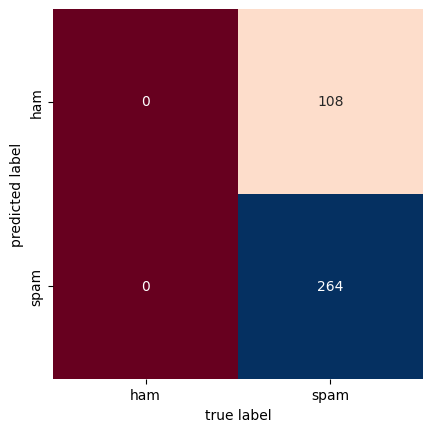


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.71      1.00      0.83       264

    accuracy                           0.71       372
   macro avg       0.35      0.50      0.42       372
weighted avg       0.50      0.71      0.59       372

Overall Accuracy :  70.97
Precision Score :  70.97
Recall Score :  100.0
AUC :  58.14 



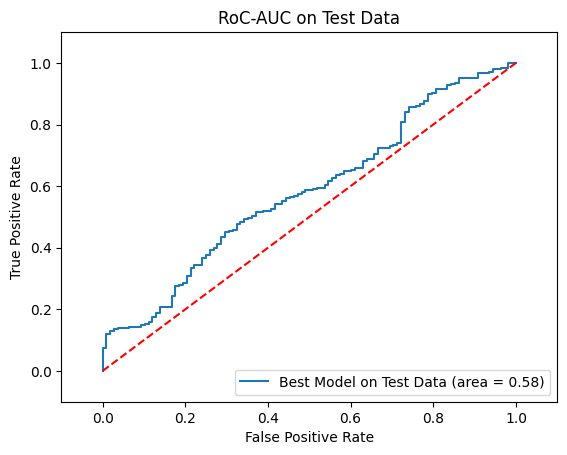

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: user 3.71 s, sys: 6.77 ms, total: 3.72 s
Wall time: 3.73 s

 Confusion Matrix


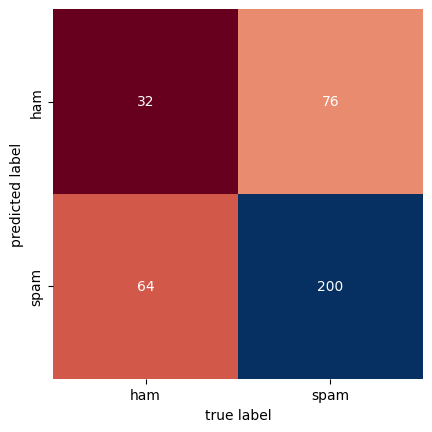


 Classification Report 

              precision    recall  f1-score   support

           0       0.33      0.30      0.31       108
           1       0.72      0.76      0.74       264

    accuracy                           0.62       372
   macro avg       0.53      0.53      0.53       372
weighted avg       0.61      0.62      0.62       372

Overall Accuracy :  62.37
Precision Score :  72.46
Recall Score :  75.76
AUC :  54.7 



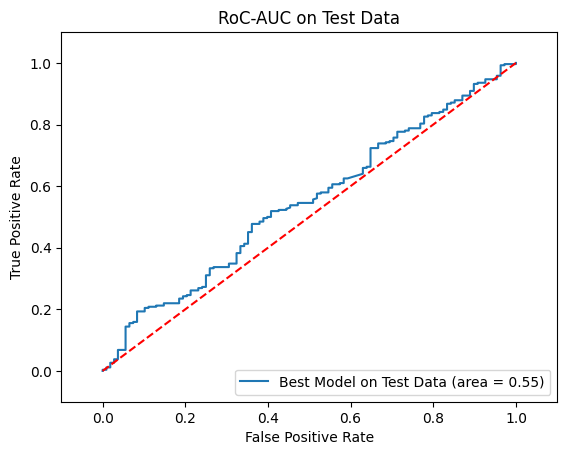

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: user 1.09 s, sys: 712 µs, total: 1.09 s
Wall time: 1.08 s

 Confusion Matrix


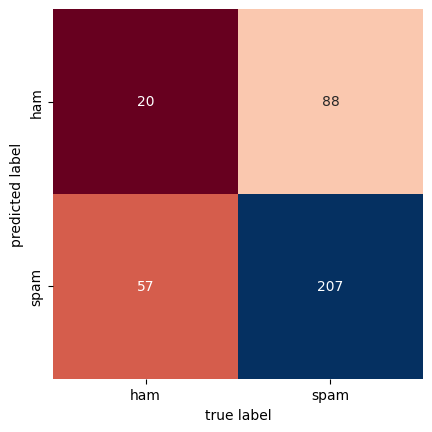


 Classification Report 

              precision    recall  f1-score   support

           0       0.26      0.19      0.22       108
           1       0.70      0.78      0.74       264

    accuracy                           0.61       372
   macro avg       0.48      0.48      0.48       372
weighted avg       0.57      0.61      0.59       372

Overall Accuracy :  61.02
Precision Score :  70.17
Recall Score :  78.41
AUC :  52.19 



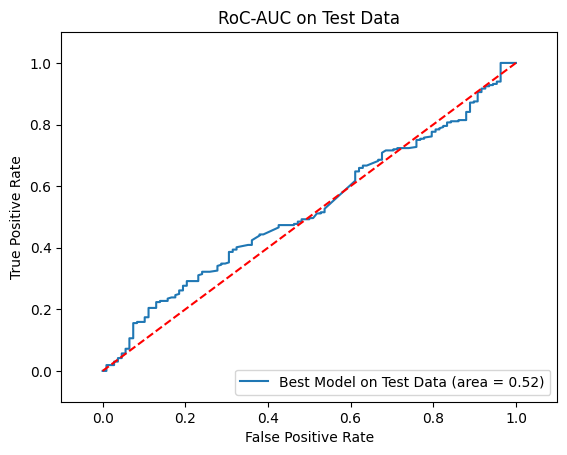

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: user 20.6 ms, sys: 957 µs, total: 21.5 ms
Wall time: 21.2 ms

 Confusion Matrix


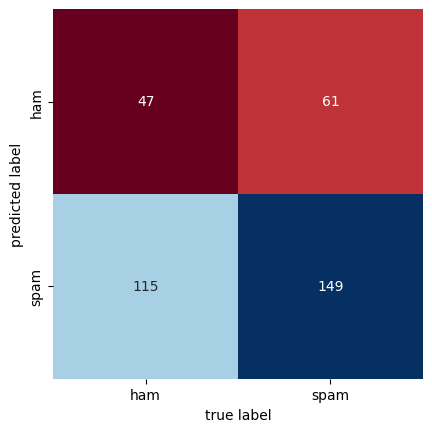


 Classification Report 

              precision    recall  f1-score   support

           0       0.29      0.44      0.35       108
           1       0.71      0.56      0.63       264

    accuracy                           0.53       372
   macro avg       0.50      0.50      0.49       372
weighted avg       0.59      0.53      0.55       372

Overall Accuracy :  52.69
Precision Score :  70.95
Recall Score :  56.44
AUC :  53.49 



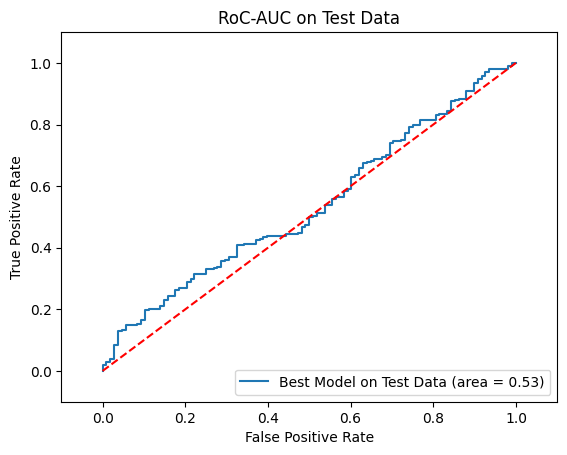

--------------------------------------------------------------------------
CPU times: user 9.91 s, sys: 812 ms, total: 10.7 s
Wall time: 9.97 s


In [ ]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(train_tf_m)

Models on Term Frequency - Bag of Words: Inverse Document Frequency data
Train Data Dimensions :  (2106, 670)
Test Data Dimensions :  (372, 670)

 Random Forest Classifier
CPU times: user 3.38 s, sys: 4.2 ms, total: 3.39 s
Wall time: 3.42 s

 Confusion Matrix


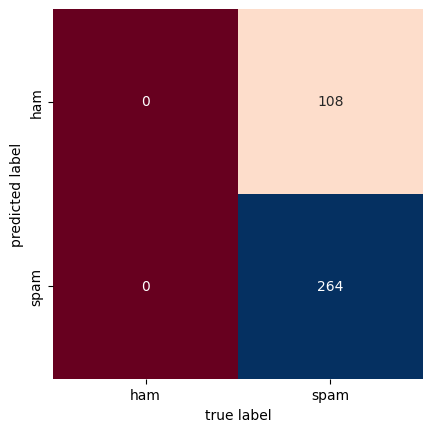


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.71      1.00      0.83       264

    accuracy                           0.71       372
   macro avg       0.35      0.50      0.42       372
weighted avg       0.50      0.71      0.59       372

Overall Accuracy :  70.97
Precision Score :  70.97
Recall Score :  100.0
AUC :  54.42 



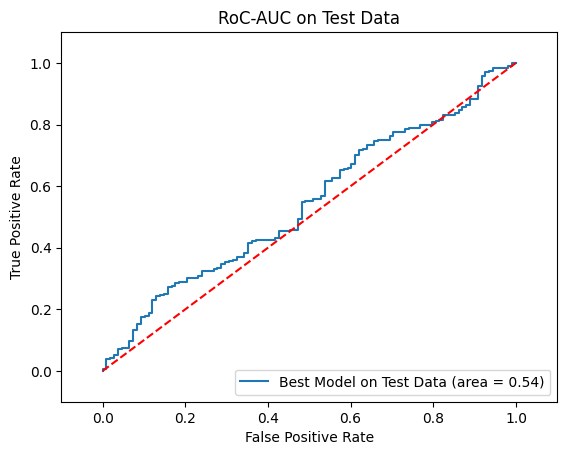

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: user 4.83 s, sys: 5.22 ms, total: 4.84 s
Wall time: 4.85 s

 Confusion Matrix


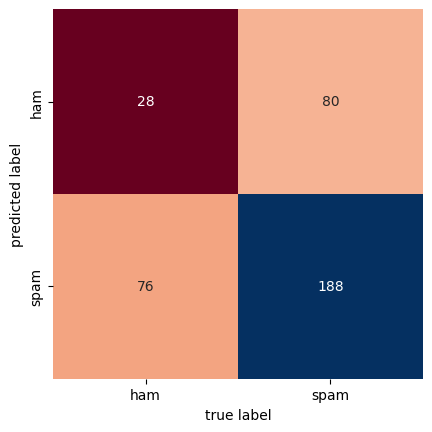


 Classification Report 

              precision    recall  f1-score   support

           0       0.27      0.26      0.26       108
           1       0.70      0.71      0.71       264

    accuracy                           0.58       372
   macro avg       0.49      0.49      0.49       372
weighted avg       0.58      0.58      0.58       372

Overall Accuracy :  58.06
Precision Score :  70.15
Recall Score :  71.21
AUC :  48.73 



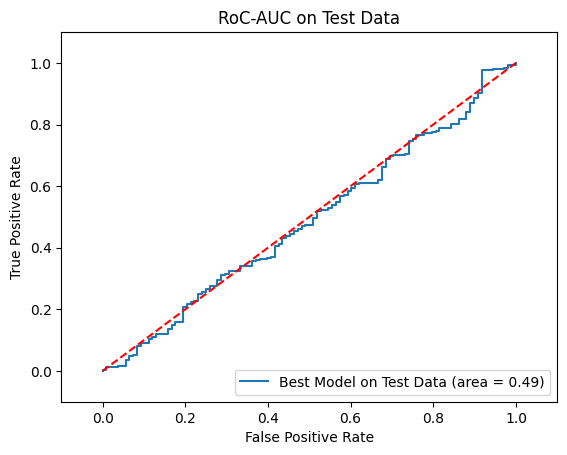

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: user 1.91 s, sys: 0 ns, total: 1.91 s
Wall time: 1.93 s

 Confusion Matrix


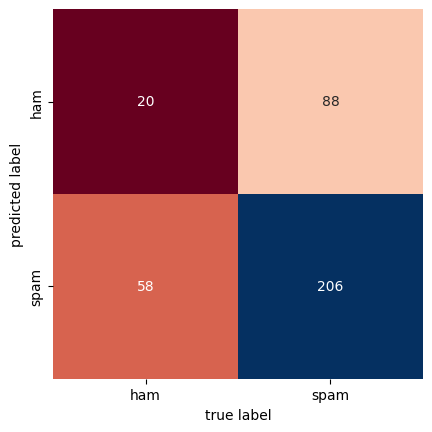


 Classification Report 

              precision    recall  f1-score   support

           0       0.26      0.19      0.22       108
           1       0.70      0.78      0.74       264

    accuracy                           0.61       372
   macro avg       0.48      0.48      0.48       372
weighted avg       0.57      0.61      0.59       372

Overall Accuracy :  60.75
Precision Score :  70.07
Recall Score :  78.03
AUC :  51.31 



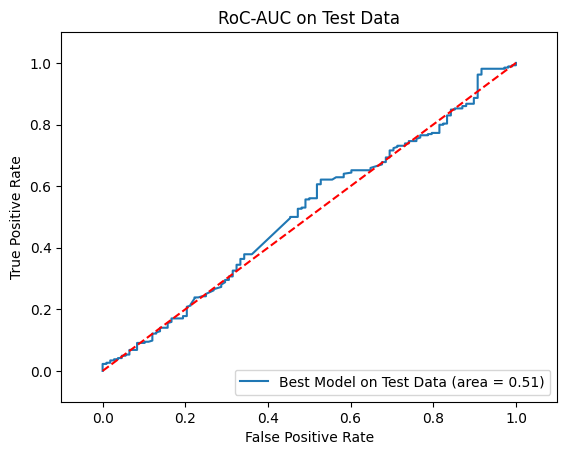

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: user 17.9 ms, sys: 916 µs, total: 18.8 ms
Wall time: 16.6 ms

 Confusion Matrix


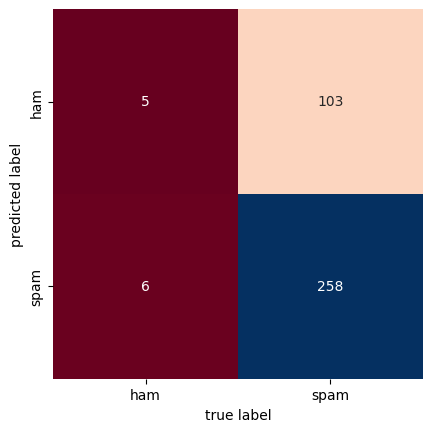


 Classification Report 

              precision    recall  f1-score   support

           0       0.45      0.05      0.08       108
           1       0.71      0.98      0.83       264

    accuracy                           0.71       372
   macro avg       0.58      0.51      0.45       372
weighted avg       0.64      0.71      0.61       372

Overall Accuracy :  70.7
Precision Score :  71.47
Recall Score :  97.73
AUC :  53.31 



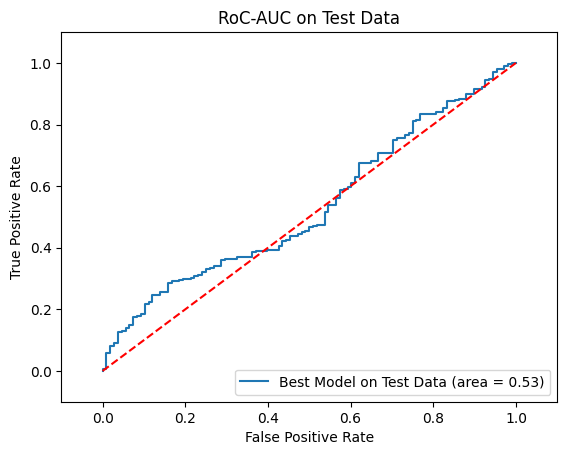

--------------------------------------------------------------------------
CPU times: user 12.9 s, sys: 575 ms, total: 13.5 s
Wall time: 13.3 s


In [ ]:
print('Models on Term Frequency - Bag of Words: Inverse Document Frequency data')
%time model_dvt(train_tfidf_m)